In [103]:
import numpy as np

In [104]:
import matplotlib.pyplot as plt

In [105]:
import pandas as pd

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
heart_data=pd.read_csv('heart.csv')

In [109]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [110]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [111]:
heart_data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [112]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [114]:
heart_data['Sex']=heart_data['Sex'].replace({'M':1,'F':0})

/tmp/ipykernel_84014/2711160503.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_data['Sex']=heart_data['Sex'].replace({'M':1,'F':0})


In [115]:
heart_data['RestingECG']=heart_data['RestingECG'].replace({'ST':1,'Normal':0})

In [116]:
heart_data['ExerciseAngina']=heart_data['ExerciseAngina'].replace({'Y':1,'N':0})

/tmp/ipykernel_84014/1470685302.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_data['ExerciseAngina']=heart_data['ExerciseAngina'].replace({'Y':1,'N':0})


In [117]:
heart_data['ST_Slope']=heart_data['ST_Slope'].replace({'Up':1,'Flat':0})

In [118]:
heart_data=heart_data.drop('ChestPainType', axis=1)

In [119]:
def is_numeric(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

mask = heart_data.applymap(is_numeric)
heart_data=heart_data[mask.all(axis=1)]

/tmp/ipykernel_84014/83222992.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = heart_data.applymap(is_numeric)


In [124]:
heart_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,140,289,0,0,172,0,0.0,1,0
1,49,0,160,180,0,0,156,0,1.0,0,1
2,37,1,130,283,0,1,98,0,0.0,1,0
3,48,0,138,214,0,0,108,1,1.5,0,1
4,54,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,140,241,0,0,123,1,0.2,0,1
913,45,1,110,264,0,0,132,0,1.2,0,1
914,68,1,144,193,1,0,141,0,3.4,0,1
915,57,1,130,131,0,0,115,1,1.2,0,1


In [125]:
X = heart_data.drop(columns='HeartDisease', axis=1)
Y = heart_data['HeartDisease']

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [127]:
print(X.shape, X_train.shape, X_test.shape)

(684, 10) (547, 10) (137, 10)


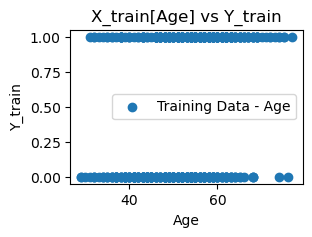

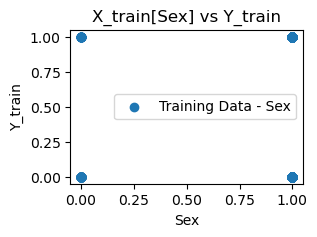

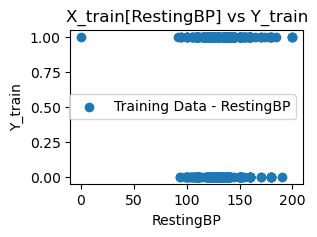

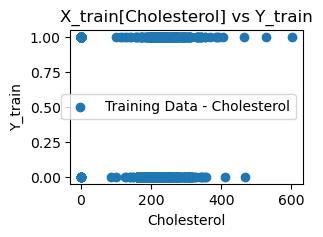

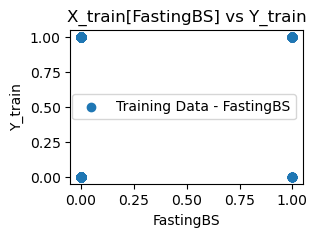

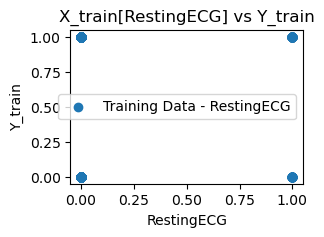

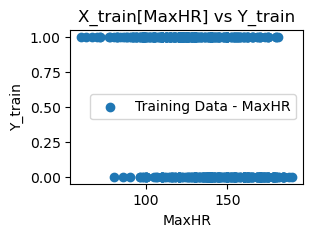

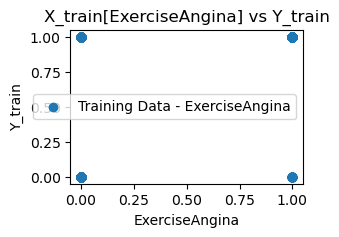

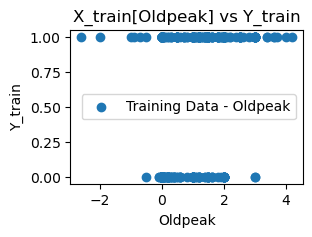

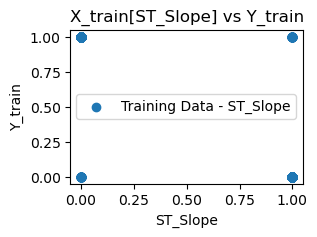

In [128]:
for feature in X_train.columns:
    plt.figure(figsize=(3, 2))
    plt.scatter(X_train[feature], Y_train, label=f'Training Data - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Y_train')
    plt.title(f'X_train[{feature}] vs Y_train')
    plt.legend()
    plt.show()

In [129]:
model = LogisticRegression()

In [130]:
model.fit(X_train, Y_train)

/home/devansh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
X_train_prediction = model.predict(X_train)

In [132]:
error1 = mean_squared_error(X_train_prediction, Y_train)

NameError: name 'mean_squared_error' is not defined